# Explore here

In [58]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
import matplotlib.pyplot as plt

# load the .env file variables
load_dotenv()



True

## Paso 3: Variables de entorno

In [7]:

load_dotenv()

client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get('CLIENT_SECRET')

## Paso 4: Inicializar la biblioteca Spotipy

In [29]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id = client_id, client_secret = client_secret))
print(sp)


## Paso 5: Realizar solicitudes a la API

In [55]:
artist_id = "790FomKkXshlbRYZFtlgla"
results = sp.artist_top_tracks(artist_id)


for track in results['tracks'][:10]:
    print('track_name    : ' + track['name'])
    print('track_uri    : ' + track['uri'])
    print('cover_art_url: ' + track['album']['images'][0]['url'])
    print('popularity: ' + str(track['popularity']))
    print('duration_ms   : ' + str(track['duration_ms']))
    print()
 


track_name    : QLONA
track_uri    : spotify:track:5RqSsdzTNPX1uzkmlHCFvK
cover_art_url: https://i.scdn.co/image/ab67616d0000b273d026bf9d7780f6a1267b4d03
popularity: 83
duration_ms   : 172797

track_name    : AMARGURA
track_uri    : spotify:track:505v13epFXodT9fVAJ6h8k
cover_art_url: https://i.scdn.co/image/ab67616d0000b27382de1ca074ae63cb18fce335
popularity: 83
duration_ms   : 170480

track_name    : MI EX TENÍA RAZÓN
track_uri    : spotify:track:54zcJnb3tp9c5OVKREZ1Is
cover_art_url: https://i.scdn.co/image/ab67616d0000b273d026bf9d7780f6a1267b4d03
popularity: 80
duration_ms   : 154374

track_name    : TQG
track_uri    : spotify:track:0DWdj2oZMBFSzRsi2Cvfzf
cover_art_url: https://i.scdn.co/image/ab67616d0000b27382de1ca074ae63cb18fce335
popularity: 79
duration_ms   : 197933

track_name    : PROVENZA
track_uri    : spotify:track:3HqcNJdZ2seoGxhn0wVNDK
cover_art_url: https://i.scdn.co/image/ab67616d0000b27382de1ca074ae63cb18fce335
popularity: 78
duration_ms   : 207626

track_name    : CON

## Paso 6: Transformar a Pandas DataFrame

In [57]:
tracks_data = []

for track in results['tracks'][:10]:
    track_info = {
        'track_name': track['name'],
        'track_uri': track['uri'],
        'cover_art_url': track['album']['images'][0]['url'],
        'popularity': track['popularity'],
        'duration_ms': track['duration_ms']
    }
    tracks_data.append(track_info)
# Crear el DataFrame
tracks_df = pd.DataFrame(tracks_data)
# Ordenar el DataFrame por la columna "popularity"
tracks_df.sort_values(["popularity"], inplace=True)
# Imprimir las primeras 3 filas del DataFrame ordenado
print(tracks_df.head(3))

      track_name                             track_uri  \
9       OKI DOKI  spotify:track:4gJfPoMIcSDGY0tMGxm6Fu   
6         MAMIII  spotify:track:7FlQk2gJ6TBrHHiidvdR2O   
8  X SI VOLVEMOS  spotify:track:4NoOME4Dhf4xgxbHDT7VGe   

                                       cover_art_url  popularity  duration_ms  
9  https://i.scdn.co/image/ab67616d0000b273d026bf...          74       143789  
6  https://i.scdn.co/image/ab67616d0000b273518859...          76       226093  
8  https://i.scdn.co/image/ab67616d0000b27382de1c...          76       200120  


## Paso 7: Analizar relación estadística

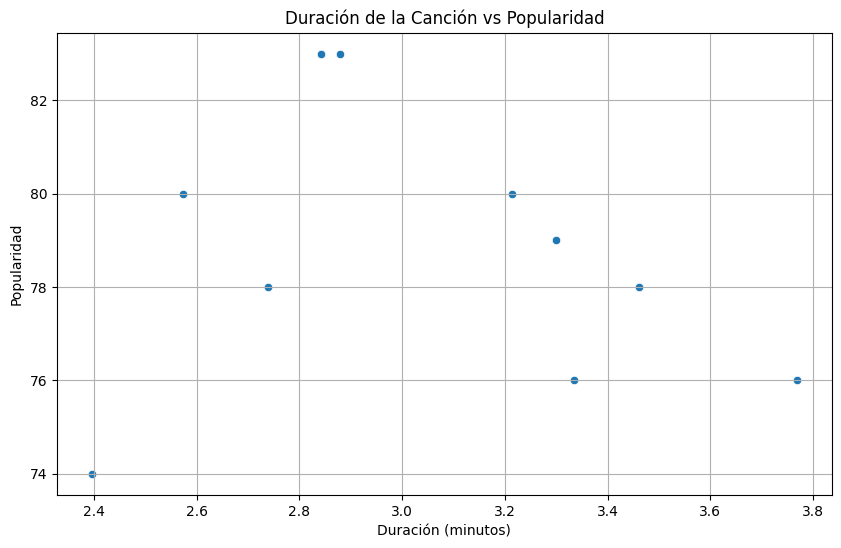

In [59]:
tracks_df['duration_min'] = tracks_df['duration_ms'] / 60000

plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_min', y='popularity', data=tracks_df)
plt.title('Duración de la Canción vs Popularidad')
plt.xlabel('Duración (minutos)')
plt.ylabel('Popularidad')
plt.grid(True)
plt.show()
